In [12]:
from pandas_datareader import data

In [13]:
bkng = data.DataReader("BKNG", 
                       start='2000-1-1', 
                       end='2020-12-31', 
                       data_source='yahoo')

In [14]:
bkng = bkng.reset_index()

In [15]:
bkng['Year'] = bkng['Date'].dt.year
bkng['month'] = bkng['Date'].dt.month
bkng['day'] = bkng['Date'].dt.day

In [16]:
def quarter(row):
    if row['month'] == 1 or row['month'] == 2 or row['month'] == 3:
        return 1
    elif row['month'] == 4 or row['month'] == 5 or row['month'] == 6:
        return 4
    elif row['month'] == 7 or row['month'] == 8 or row['month'] == 9:
        return 7
    else:
        return 10

bkng['quarter'] = bkng.apply(quarter, axis =1)

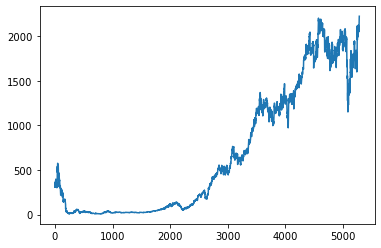

In [17]:
import matplotlib.pyplot as plt
plt.plot(bkng['Adj Close'])
plt.show()

In [18]:
import pandas as pd

data = pd.read_csv('data_usa.csv', index_col=0)

data_bkng = data[data['year'] >= 2000 ]
data_bkng

,DATE,GDP,growth_rate,year,month,jobs,growth_jobs
212,2000-01-01,10002.857,1.045308,2000,1,131005,0.636057
213,2000-04-01,10247.679,2.447521,2000,4,131888,0.674020
214,2000-07-01,10319.825,0.704023,2000,7,132236,0.263860
215,2000-10-01,10439.025,1.155058,2000,10,132351,0.086966
216,2001-01-01,10472.879,0.324302,2001,1,132698,0.262182
...,...,...,...,...,...,...,...
291,2019-10-01,21729.124,0.866119,2019,10,151524,0.404869
292,2020-01-01,21539.689,-0.871802,2020,1,152234,0.468573
293,2020-04-01,19520.114,-9.376064,2020,4,130161,-14.499389
294,2020-07-01,21170.252,8.453526,2020,7,139566,7.225667


In [19]:
bkng_final = pd.merge(left = data_bkng.reset_index(drop=True), right = bkng, left_on = 'month', right_on = 'quarter', how= 'left')

In [20]:
bkng_final = bkng_final[['Date','GDP','growth_rate','jobs','growth_jobs','High','Low','Open','Close','Volume','Adj Close','quarter','Year','month_y','day']].set_index('Date')

bkng_final

,GDP,growth_rate,jobs,growth_jobs,High,Low,Open,Close,Volume,Adj Close,quarter,Year,month_y,day
Date,,,,,,,,,,,,,,
2000-01-03,10002.857,1.045308,131005,0.636057,318.000000,288.000000,315.000000,307.500000,847700.0,307.500000,1,2000,1,3
2000-01-04,10002.857,1.045308,131005,0.636057,343.500000,307.500000,308.250000,324.000000,972750.0,324.000000,1,2000,1,4
2000-01-05,10002.857,1.045308,131005,0.636057,385.312500,327.750000,331.500000,359.625000,1605417.0,359.625000,1,2000,1,5
2000-01-06,10002.857,1.045308,131005,0.636057,384.750000,326.250000,368.250000,345.000000,1175267.0,345.000000,1,2000,1,6
2000-01-07,10002.857,1.045308,131005,0.636057,364.500000,333.750000,358.125000,343.500000,339417.0,343.500000,1,2000,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,21487.896,1.500426,142545,2.134474,2119.000000,2081.000000,2119.000000,2088.350098,182500.0,2088.350098,10,2020,12,24
2020-12-28,21487.896,1.500426,142545,2.134474,2152.260010,2124.459961,2129.449951,2137.919922,251000.0,2137.919922,10,2020,12,28
2020-12-29,21487.896,1.500426,142545,2.134474,2200.000000,2153.959961,2165.979980,2185.399902,341900.0,2185.399902,10,2020,12,29


In [21]:
X = bkng_final.drop(['GDP','jobs','Close','Volume'], axis = 1)
y = bkng_final['Close']

X_train = X[:105416]
y_train = y[1:105417]

X_test = X[105416:len(X)-1]
y_test = y[105417:]

In [22]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
display(xgb_reg.score(X_test,y_test))
display(xgb_reg.score(X_train,y_train))

[12:43:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.997893473753939

0.9978504887330489

In [23]:
pred = xgb_reg.predict(X_test)

In [24]:
from sklearn.metrics import r2_score


r2_score(y_test, pred)

0.997893473753939

In [25]:
from sklearn.model_selection import cross_validate

results = cross_validate(xgb_reg,X_train, y_train, cv = 10)


[12:43:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [37]:
xgb_reg.predict(pd.DataFrame([1.500426, 2.134474, 2312.80, 2178.88, 2235.77,2307.10,1 ,2021, 3, 9],X.columns).T)

array([2181.7827], dtype=float32)

In [33]:
2235.77	2312.80	2178.88	2,307.10	2307.10	

,growth_rate,growth_jobs,High,Low,Open,Adj Close,quarter,Year,month_y,day
0,1.500426,2.134474,2412.34,2298.36,2303.43,2368.74,1.0,2021.0,3.0,9.0


In [31]:
X.columns

Index(['growth_rate', 'growth_jobs', 'High', 'Low', 'Open', 'Adj Close',
       'quarter', 'Year', 'month_y', 'day'],
      dtype='object')

In [ ]:
results['test_score'].mean()
results['test_score']

In [ ]:
import pickle

pickle.dump(xgb_reg, open('model_bkng.p', 'wb'))